In [1]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 


F:\Jupiter\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [45]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [63]:
day_energy = read_csv('dayenergy.csv')

In [13]:
day_energy['date'] = pd.to_datetime(day_energy['date'])
day_energy.head()

date      0      1      2        3      4        5      6        7  \
0 2015-01-01  25385  24382  22734  21286.0  20264  19905.0  20010  20377.0   
1 2015-01-02  27070  24935  23214  22540.0  22096  22066.0  22275  23025.0   
2 2015-01-03  25564  23584  22194  21296.0  21145  21316.0  21674  22127.0   
3 2015-01-04  25254  23620  22606  22191.0  21929  22195.0  24035  26807.0   
4 2015-01-05  25069  23390  21988  21182.0  20778  20309.0  20252  19964.0   

         8  ...           14           15           16           17       18  \
0  20094.0  ...  24672.00000  23528.00000  23118.00000  23606.00000  26447.0   
1  23699.0  ...  29241.00000  27973.00000  27320.00000  27157.00000  29045.0   
2  22756.0  ...  26416.00000  25362.00000  24770.00000  24501.00000  24992.0   
3  28316.0  ...  28741.00000  28249.00000  28105.00000  27908.00000  27577.0   
4  20796.0  ...  28696.93991  28696.93991  28696.93991  28696.93991  21888.0   

        19     20       21       22       23  
0  28020.0  29014  29571.0  29031.0  26798.0  
1  31967.0  33266  33668.0  32426.0  29705.0  
2  27964.0  29694  29874.0  28979.0  26863.0  
3  27418.0  28604  30346.0  28190.0  26270.0  
4  22048.0  22858  25604.0  25381.0  23822.0  

[5 rows x 25 columns]

In [22]:
print(day_energy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2015/1/1 to 2018/12/31
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1461 non-null   int64  
 1   1       1461 non-null   int64  
 2   2       1461 non-null   int64  
 3   3       1461 non-null   float64
 4   4       1461 non-null   int64  
 5   5       1461 non-null   float64
 6   6       1461 non-null   int64  
 7   7       1461 non-null   float64
 8   8       1461 non-null   float64
 9   9       1461 non-null   float64
 10  10      1461 non-null   float64
 11  11      1461 non-null   float64
 12  12      1461 non-null   float64
 13  13      1461 non-null   float64
 14  14      1461 non-null   float64
 15  15      1461 non-null   float64
 16  16      1461 non-null   float64
 17  17      1461 non-null   float64
 18  18      1461 non-null   float64
 19  19      1461 non-null   float64
 20  20      1461 non-null   int64  
 21  21      1461 non-null   float

As we can see, in most hours. The data has relatively same mean and stand deviation, but it is a bit seasonal. Thus, the data is not
perfectly stationary.In this case, I have to integrate the data, so ARIMA model is a good choice for time series analysis. SARIMA is for seasonal time series analysis, I will try it later.

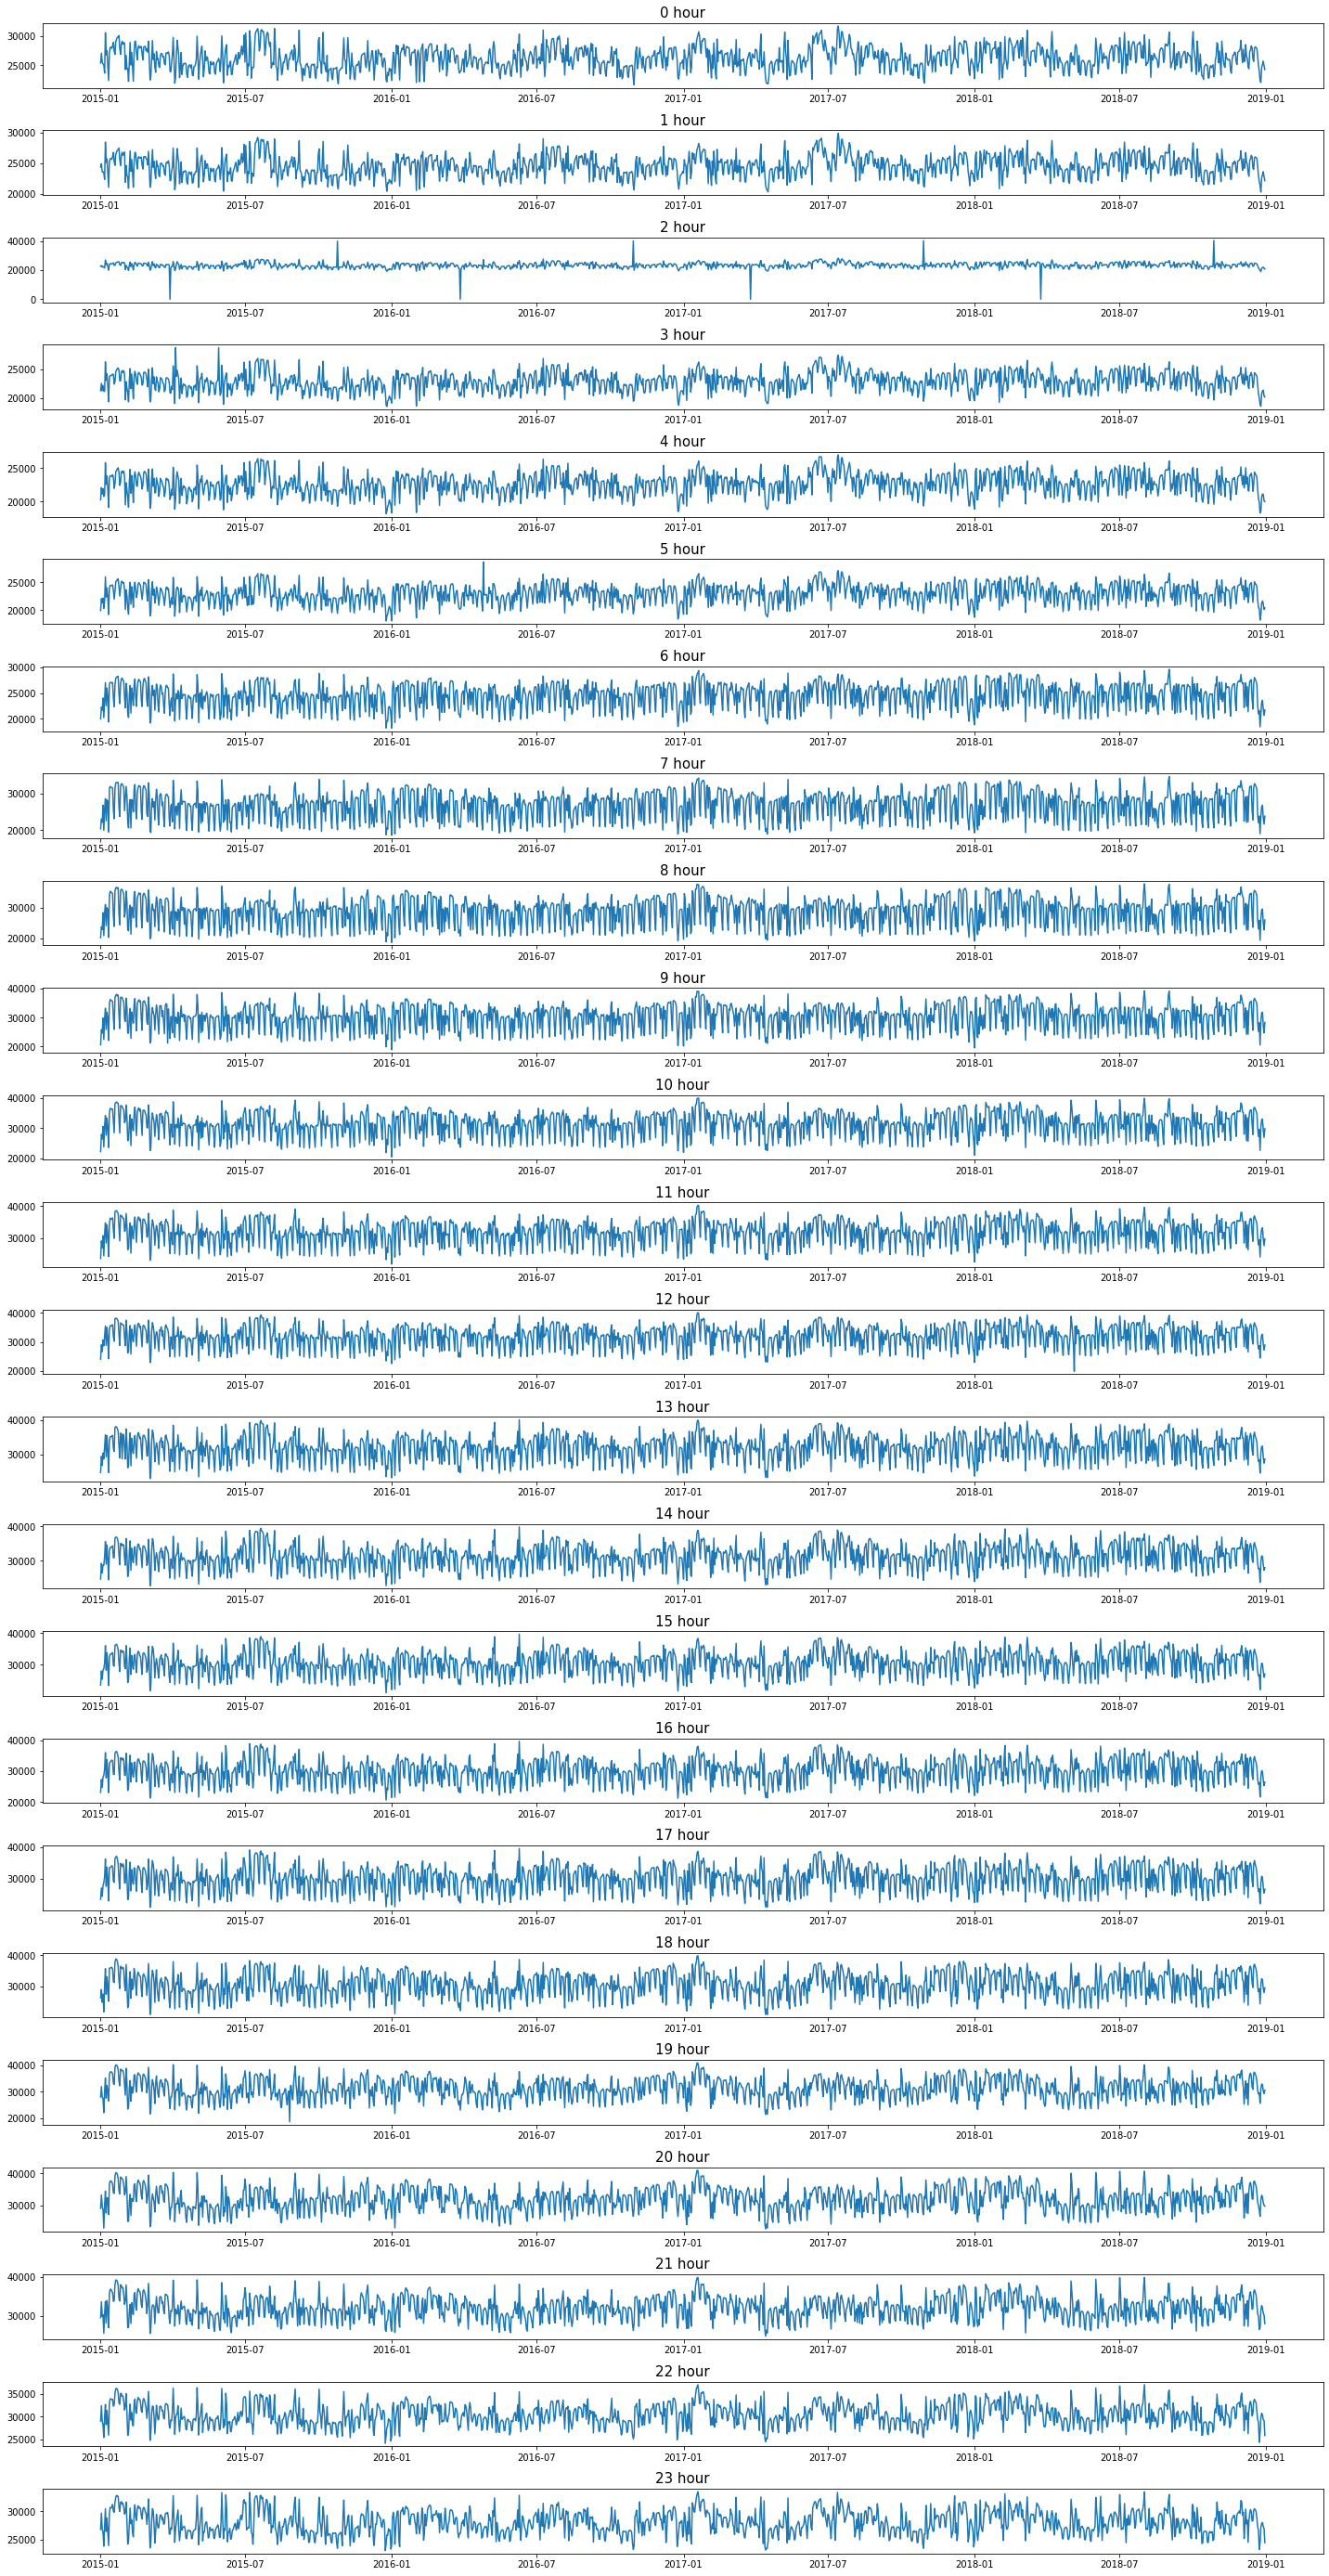

In [29]:
pyplot.figure(figsize=(20,40))
for i in range(1,25):
  p = pyplot.subplot2grid((25,1),(i,0))
  pyplot.plot(day_energy.date, day_energy.iloc[:, i])
  pyplot.title(str(i-1) + ' hour',fontsize=15)
  pyplot.tight_layout()
pyplot.show()

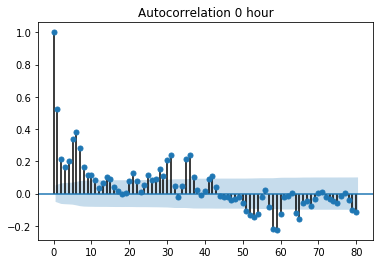

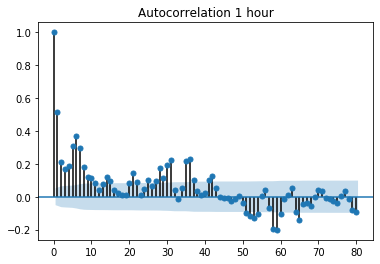

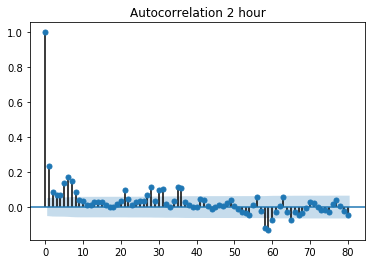

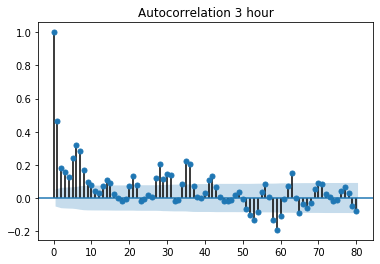

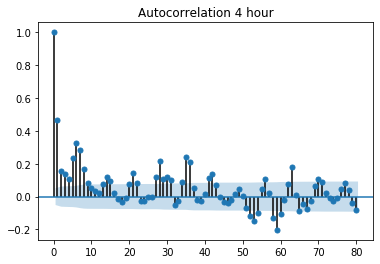

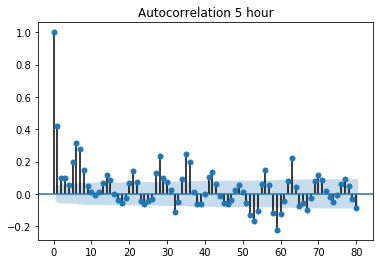

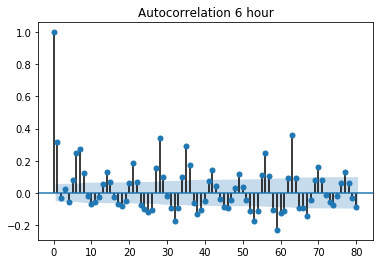

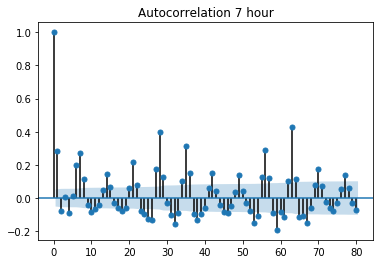

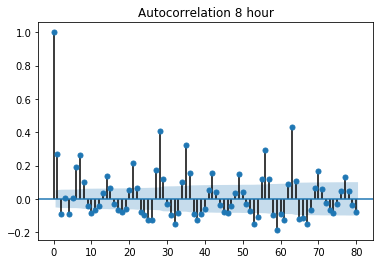

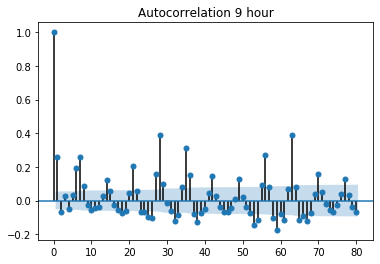

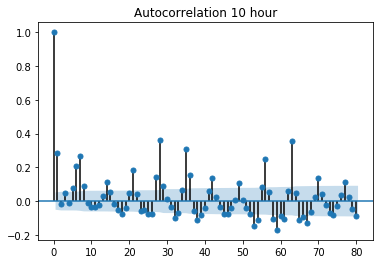

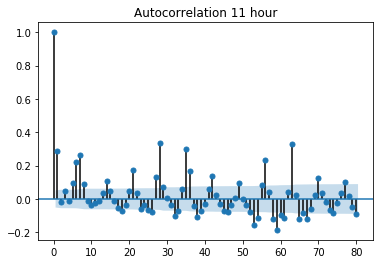

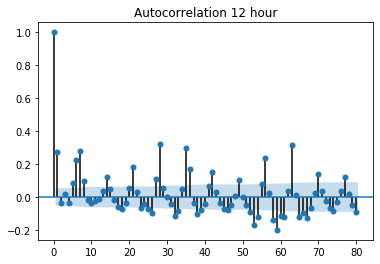

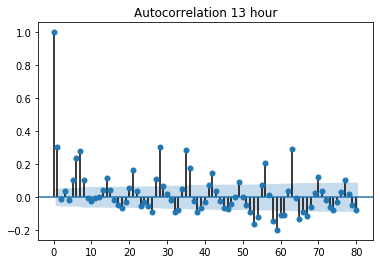

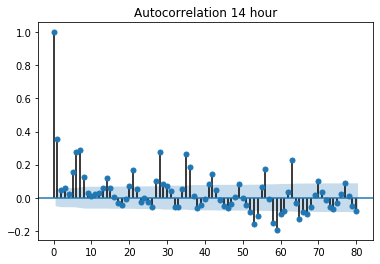

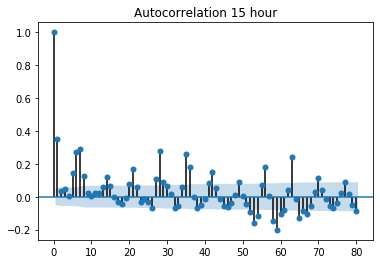

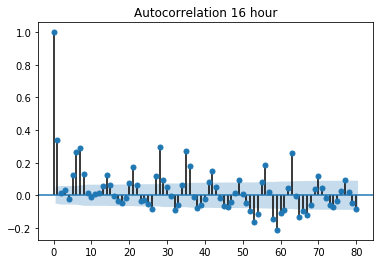

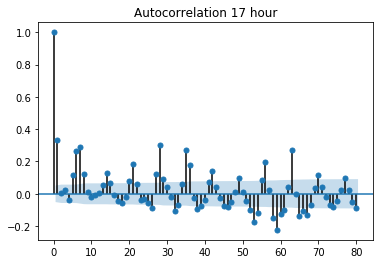

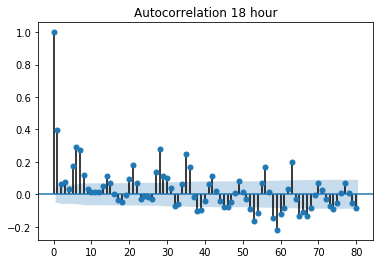

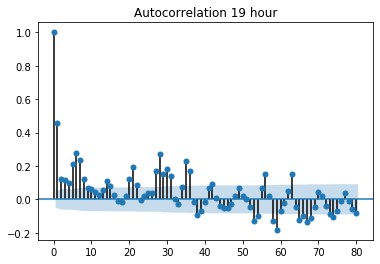

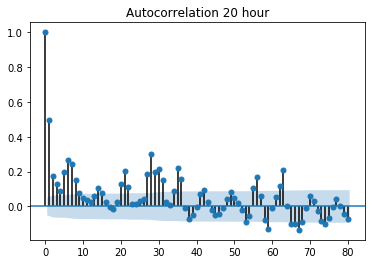

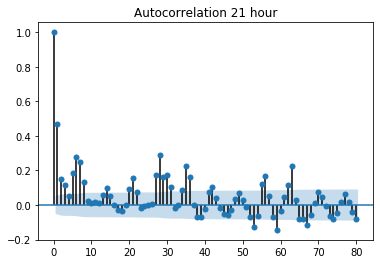

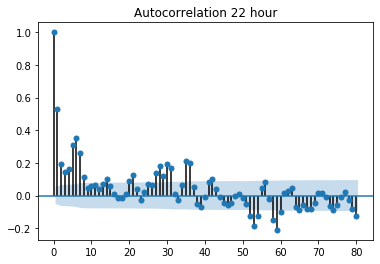

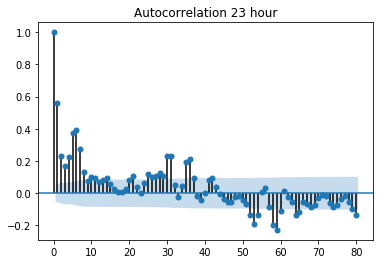

In [4]:
for h in range(1,25):
    plot_acf(day_energy.iloc[:, h], lags=80)
    pyplot.title('Autocorrelation ' + str(h-1)+ ' hour')
    pyplot.show()

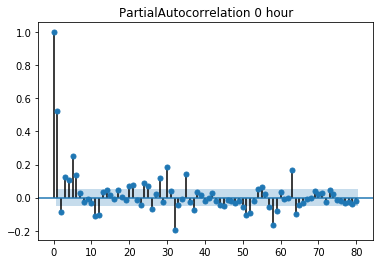

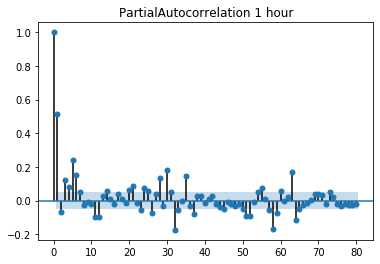

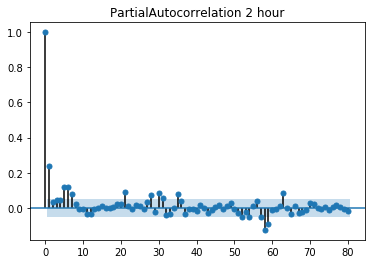

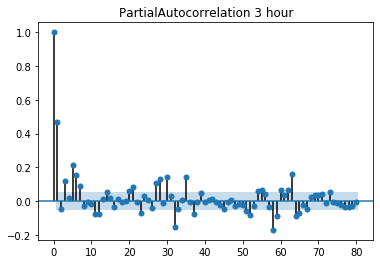

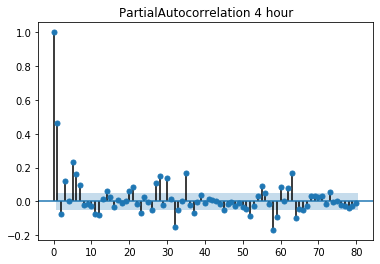

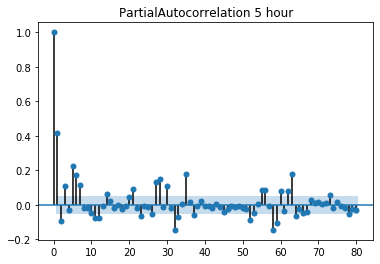

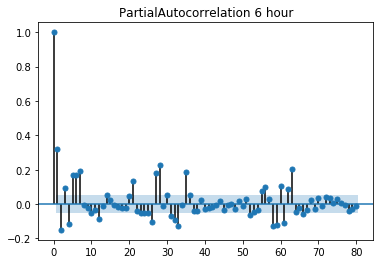

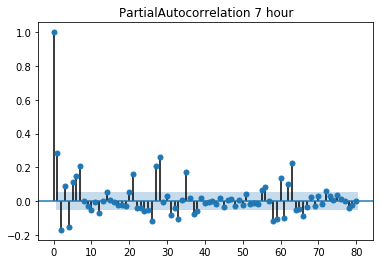

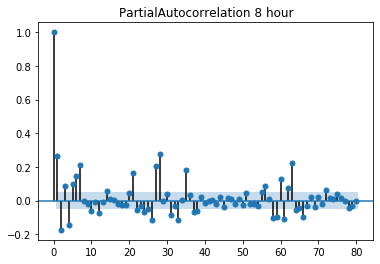

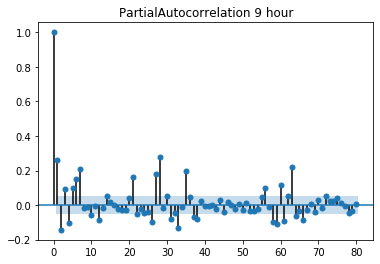

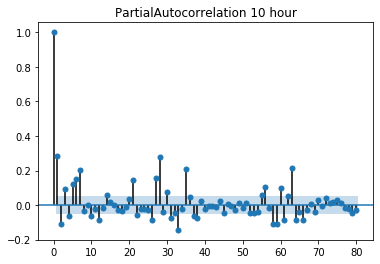

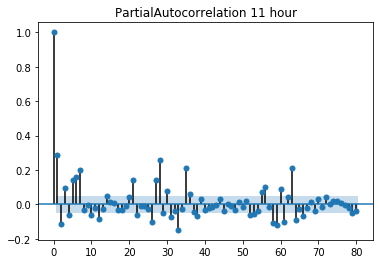

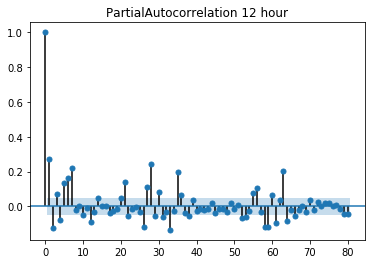

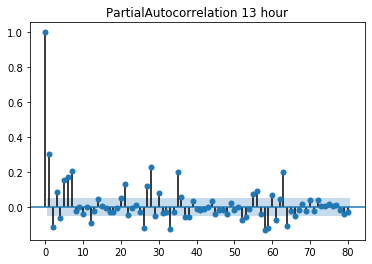

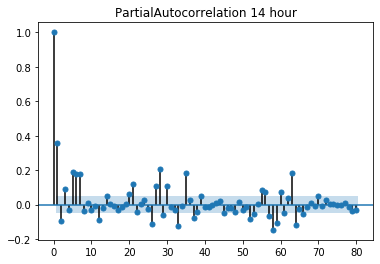

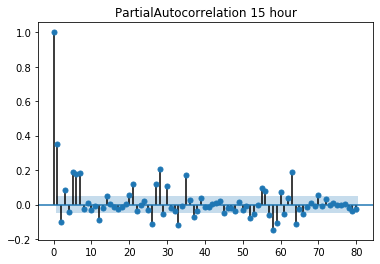

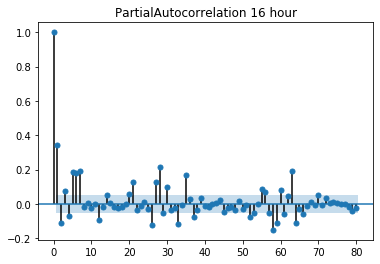

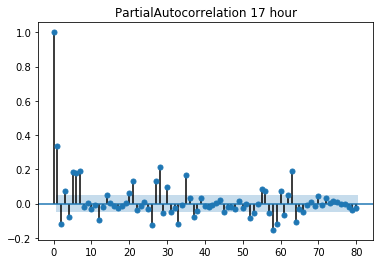

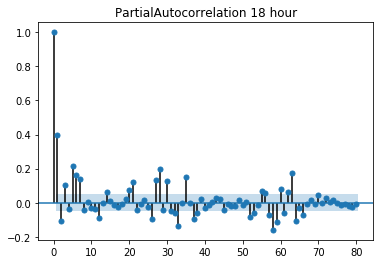

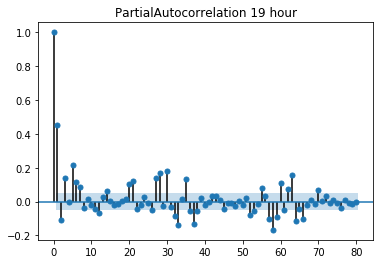

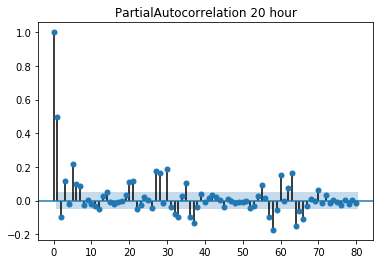

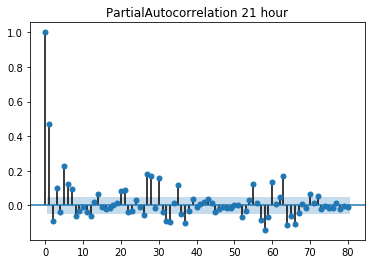

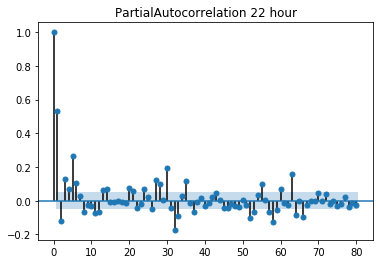

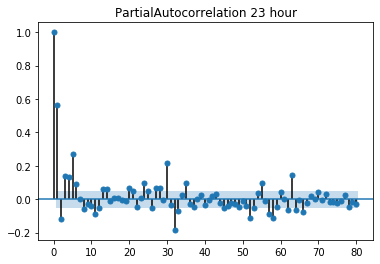

In [5]:
for h in range(1,25):
    plot_pacf(day_energy.iloc[:, h], lags=80)
    pyplot.title('PartialAutocorrelation ' + str(h-1)+ ' hour')
    pyplot.show()

# Apply ARIMA model for original energy data
* Fisrt is to run ARIMA model on the original energy data. However, it is impossible to run the whole data (already tried). Thus, first 400 lines and 500 lines has been tried to run the ARIMA model. The order of Autoregression and Moving Average are decided through the acf and pacf plot. 
* 4/5 of data on training set, 1/5 of data on test set

In [39]:
energytotal = read_csv('energydata.csv') 

In [40]:
energytotal.head(5)

Unnamed: 0              time  total load actual
0           0  2015-01-01 00:00            25385.0
1           1  2015-01-01 01:00            24382.0
2           2  2015-01-01 02:00            22734.0
3           3  2015-01-01 03:00            21286.0
4           4  2015-01-01 04:00            20264.0

In [41]:
print(energytotal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35064 non-null  int64  
 1   time               35064 non-null  object 
 2   total load actual  35064 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 821.9+ KB
None


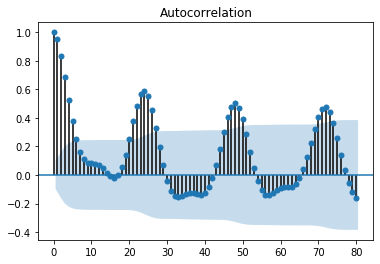

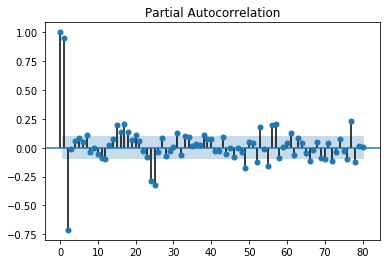

In [58]:
Energy = energytotal.iloc[1:400 , 2]
plot_acf(Energy, lags=80)
plot_pacf(Energy, lags=80)
pyplot.show()

Test MSE: 849391.735


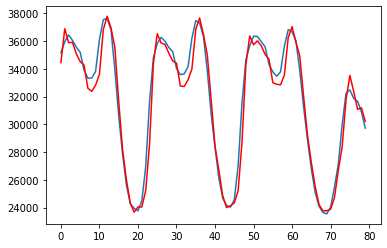

16.717518865957263

In [60]:
X = Energy.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
mean_absolute_percentage_error(test, predictions)

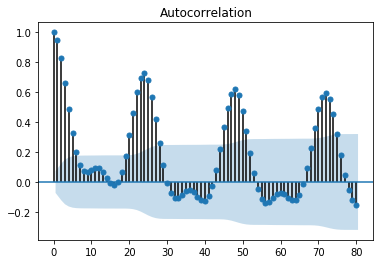

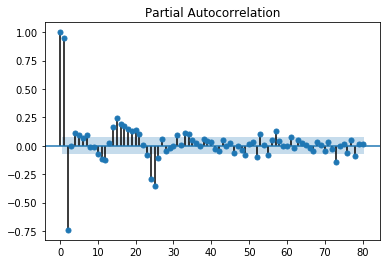

In [59]:
plot_acf(energytotal.iloc[1:720 , 2], lags=80)
plot_pacf(energytotal.iloc[1:720 , 2], lags=80)
pyplot.show()

In [56]:
energy = energytotal.iloc[1:720 , 2]

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 2149735.189


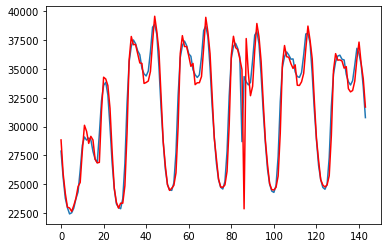

18.72252338473947

In [57]:
X = energy.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
mean_absolute_percentage_error(test, predictions)

It seems 500 lines is getting worse result compared to 400 lines. That might means even more data will not giving better prediction.
Therefore, the best MAPE result should be around 17%

# Apply ARIMA model for Each hour
* 4/5 of data on training set, 1/5 of data on test set for every model in order to have a fair comparision

In [6]:
merged = day_energy.iloc[: , 1]

Test MSE: 1958186.966


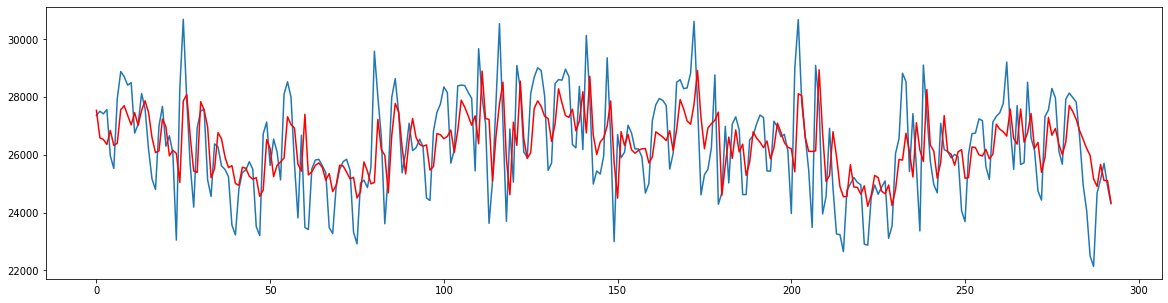

In [16]:
X = merged.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [20]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(test, predictions)

6.099858232420351

In [3]:
merged1 = day_energy.iloc[: , 2]

Test MSE: 1644240.702


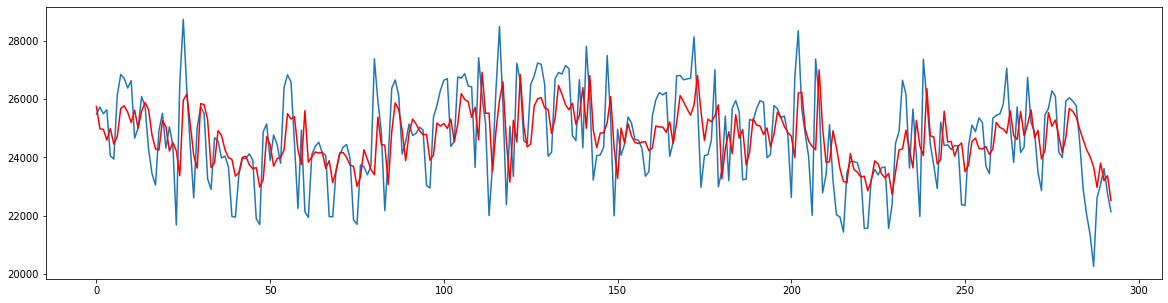

In [4]:
X = merged1.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [5]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(test, predictions)

5.921192358865284

Test MSE: 3068367.809


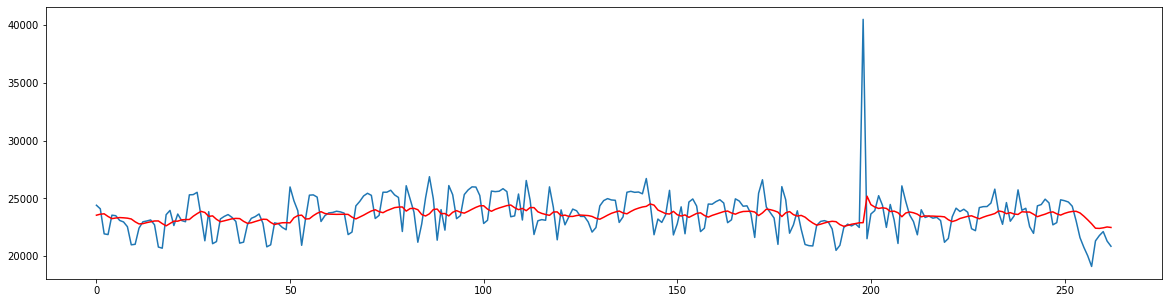

In [67]:
merged2 = day_energy.iloc[: , 3]
X = merged2.values
size = int(len(X) * 41/50)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [68]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / (y_test)) * 100)
mean_absolute_percentage_error(test, predictions)

5.537433121627183

Test MSE: 1666611.207


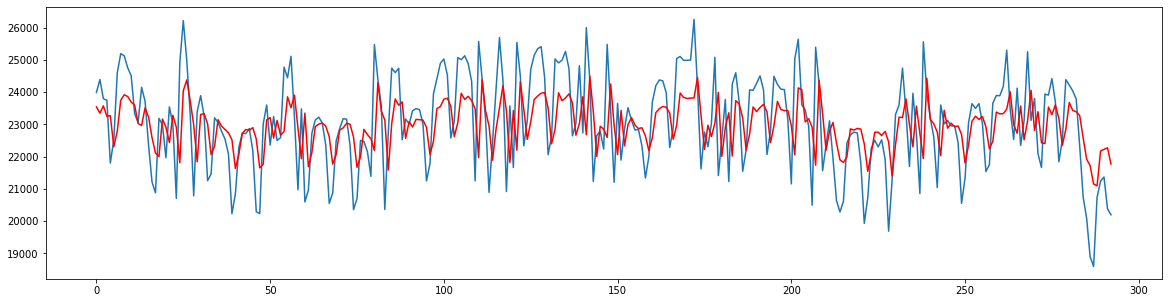

In [10]:
merged3 = day_energy.iloc[: , 4]
X = merged3.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [11]:
mean_absolute_percentage_error(test, predictions)

5.746633420702605

Test MSE: 1548069.728


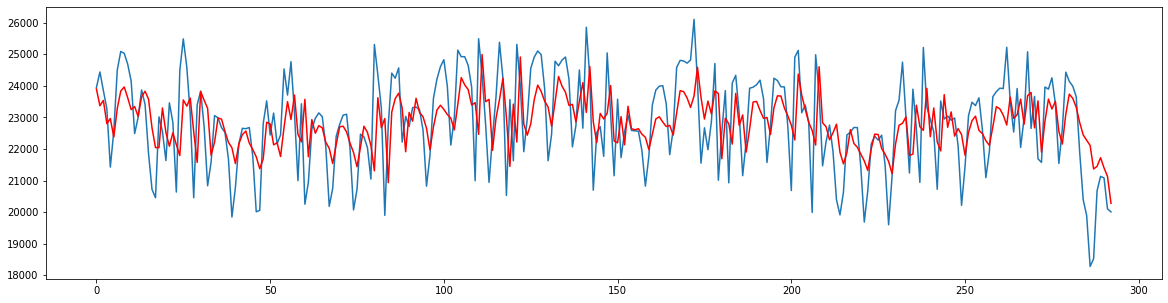

5.951338282508133


In [12]:
merged4 = day_energy.iloc[: , 5]
X = merged4.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 2035641.450


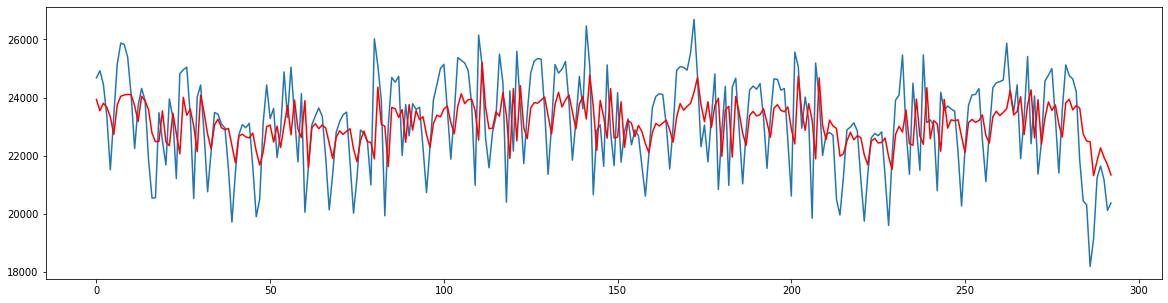

6.1982507118645875


In [13]:
merged5 = day_energy.iloc[: , 6]
X = merged5.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 4451236.518


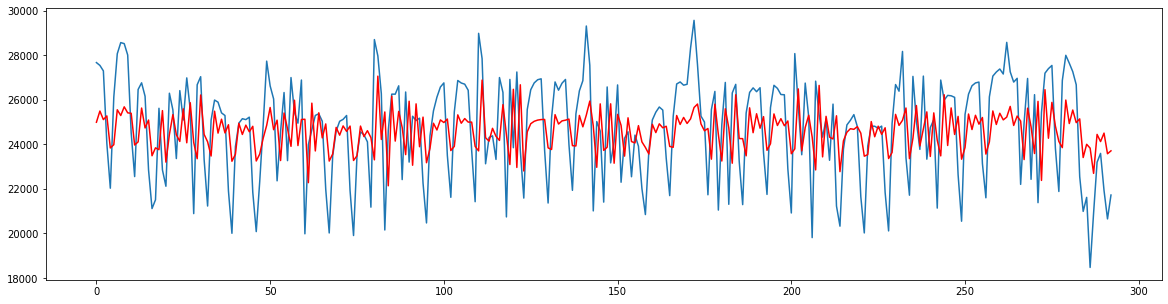

8.369794129566195


In [7]:
merged6 = day_energy.iloc[: , 7]
X = merged6.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mean_absolute_percentage_error(test, predictions))

F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 11382308.246


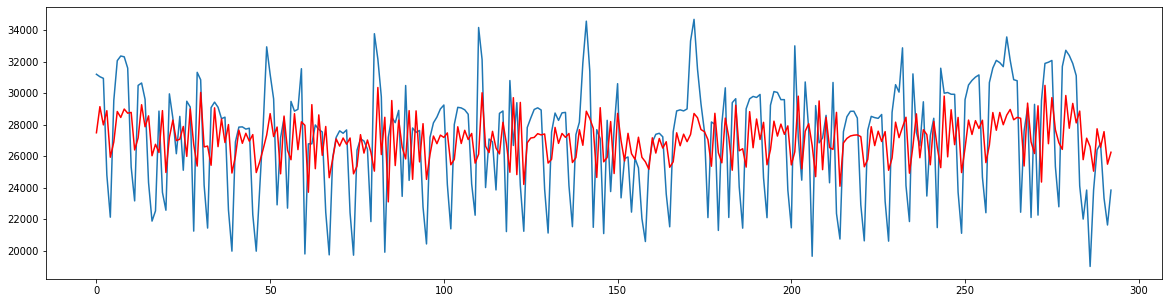

12.29309148862529


In [8]:
merged7 = day_energy.iloc[: , 8]
X = merged7.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 14892312.145


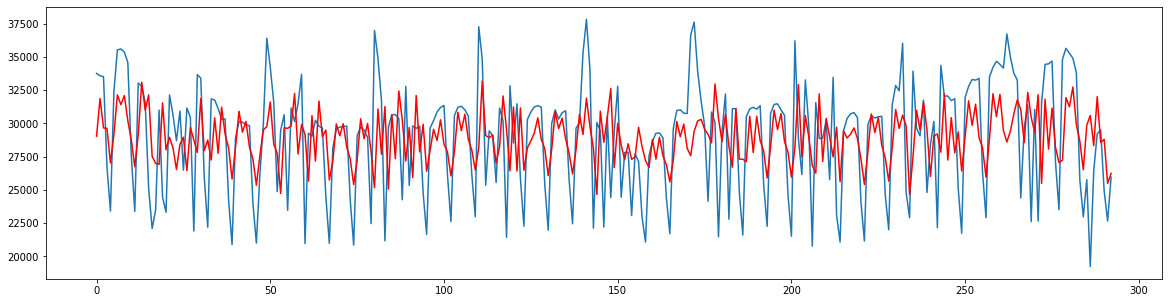

13.737373256789615


In [6]:
merged8 = day_energy.iloc[: , 9]
X = merged8.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 13390769.870


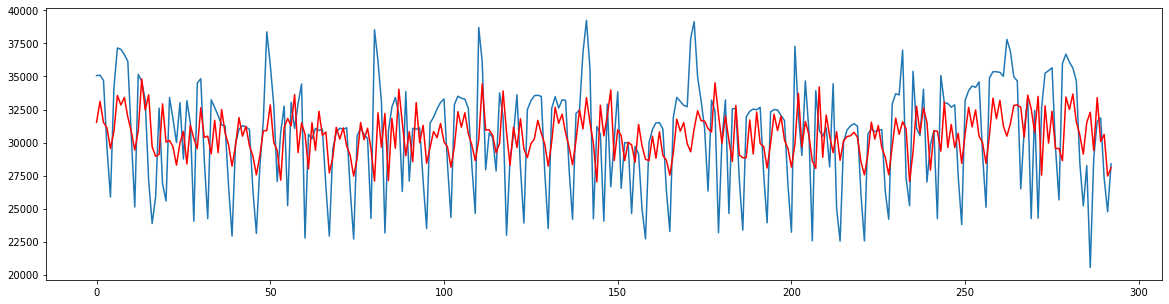

11.949902730234472


In [9]:
merged9 = day_energy.iloc[: , 10]
X = merged9.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 11192825.965


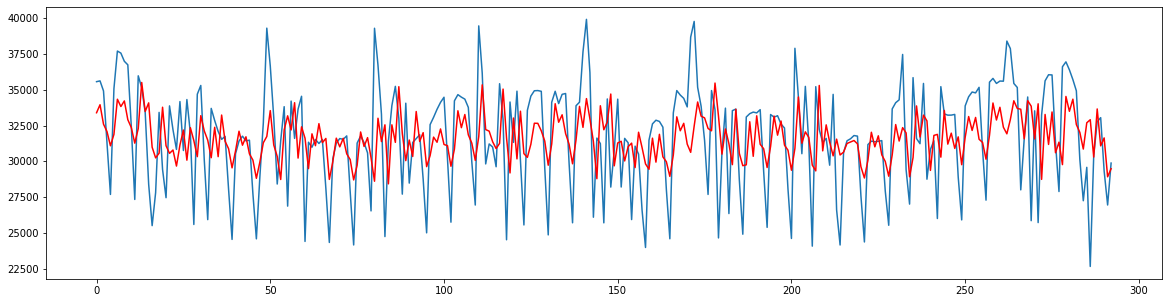

10.38573197972993


In [10]:
merged10 = day_energy.iloc[: , 11]
X = merged10.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 9765013.382


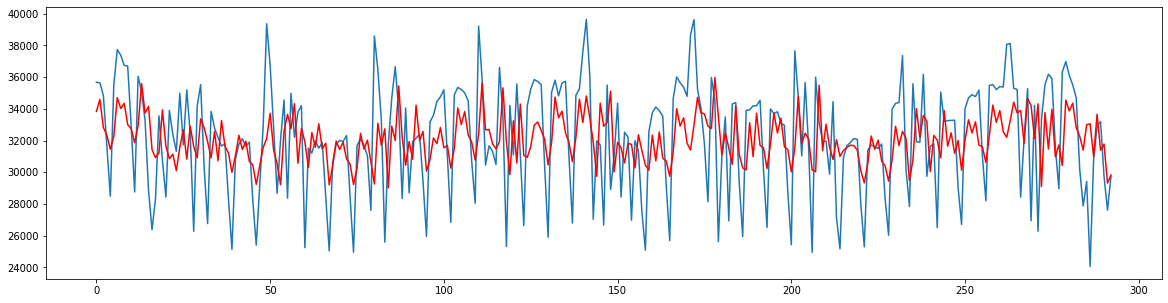

9.68909668282087


In [12]:
merged11 = day_energy.iloc[: , 12]
X = merged11.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 10032663.487


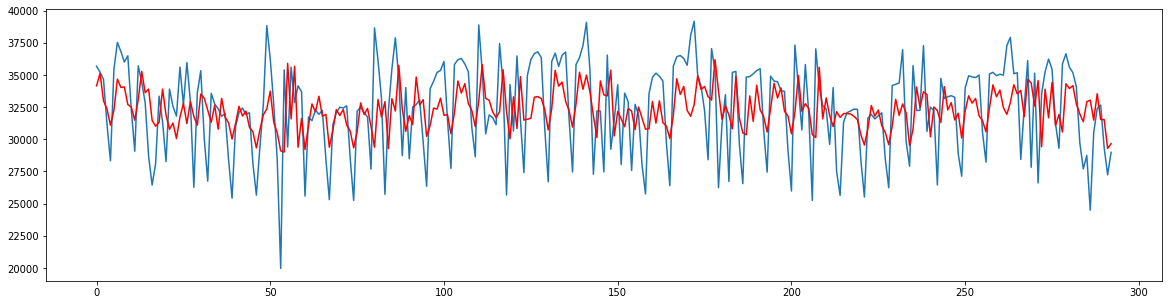

9.91014907251042


In [13]:
merged12 = day_energy.iloc[: , 13]
X = merged12.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 9091228.684


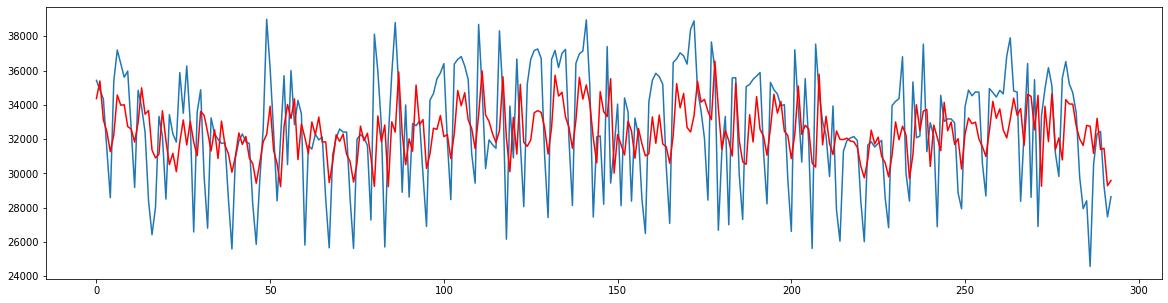

9.450946239857322


In [14]:
merged13 = day_energy.iloc[: , 14]
X = merged13.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 8759298.119


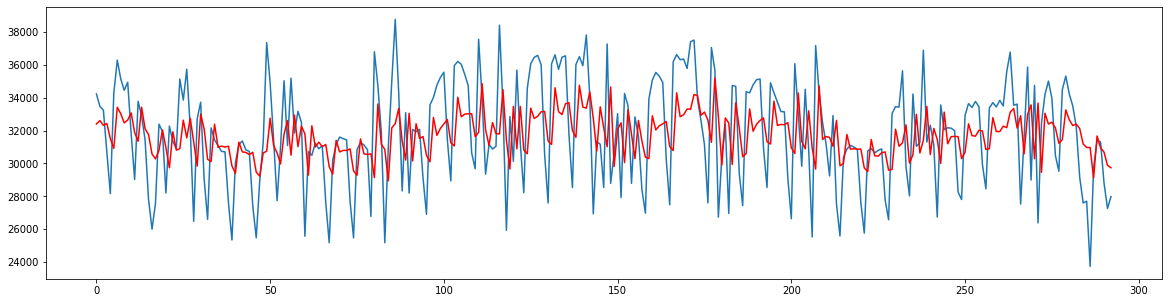

8.988319815481308


In [15]:
merged14 = day_energy.iloc[: , 15]
X = merged14.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 9084077.978


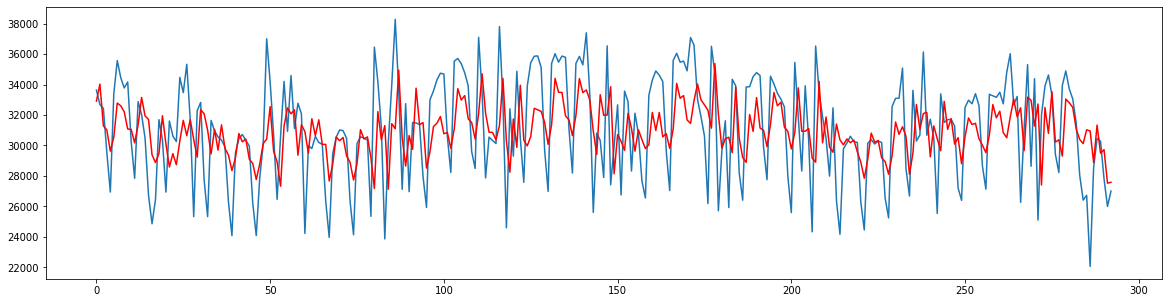

10.110400765463309


In [16]:
merged15 = day_energy.iloc[: , 16]
X = merged15.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 10176614.141


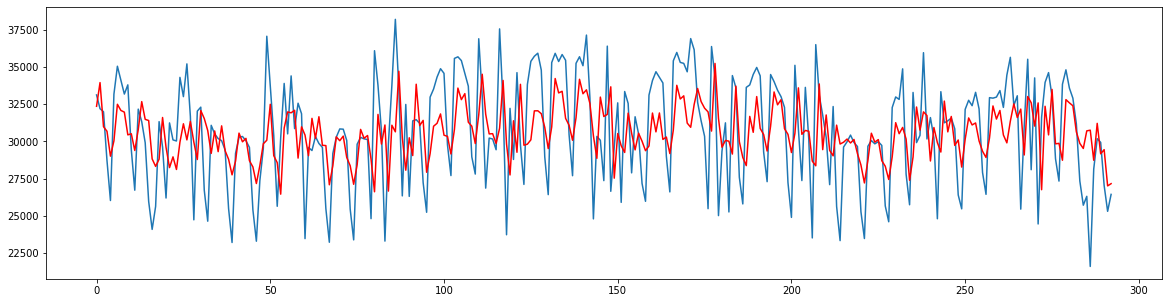

10.926370218453247


In [17]:
merged16 = day_energy.iloc[: , 17]
X = merged16.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 10530912.858


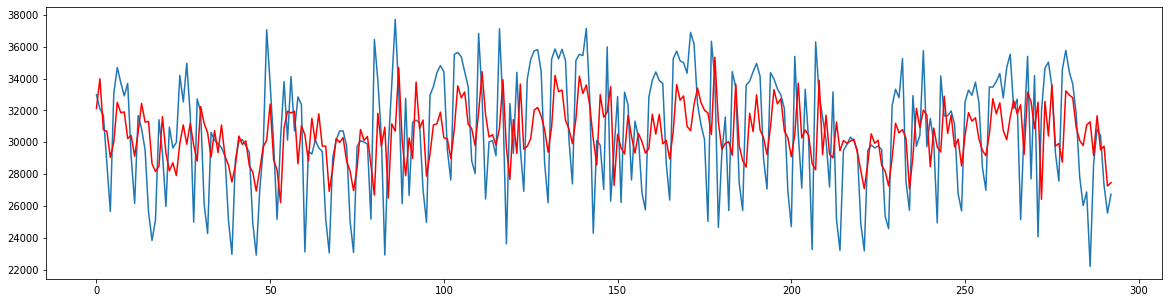

11.196510849030044


In [19]:
merged17 = day_energy.iloc[: , 18]
X = merged17.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 10114885.442


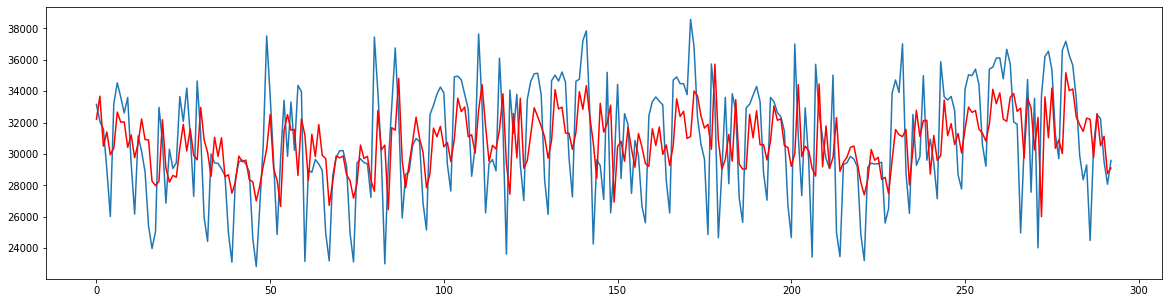

11.129520811317278


In [20]:
merged18 = day_energy.iloc[: , 19]
X = merged18.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 10448512.723


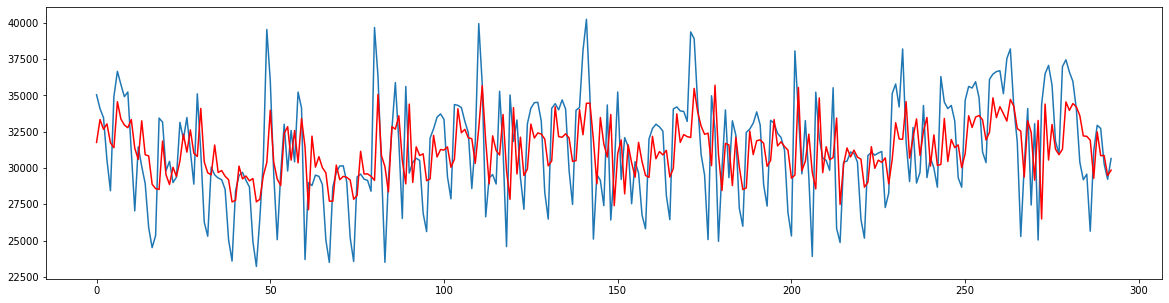

10.790926386309085


In [21]:
merged19 = day_energy.iloc[: , 20]
X = merged19.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 8471147.028


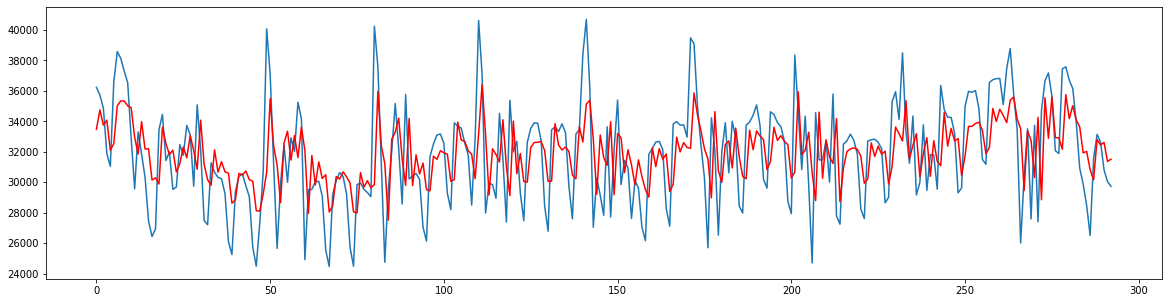

9.830751069105133


In [22]:
merged20 = day_energy.iloc[: , 21]
X = merged20.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Jupiter\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 6040522.273


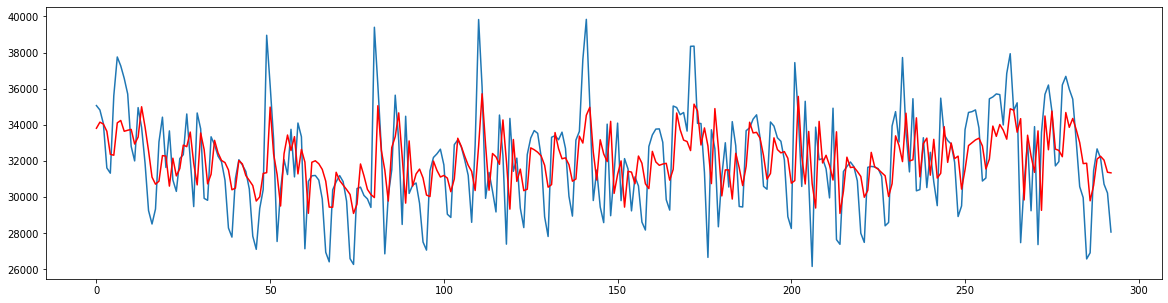

7.795604004222461


In [5]:
merged21 = day_energy.iloc[: , 22]
X = merged21.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 3732445.321


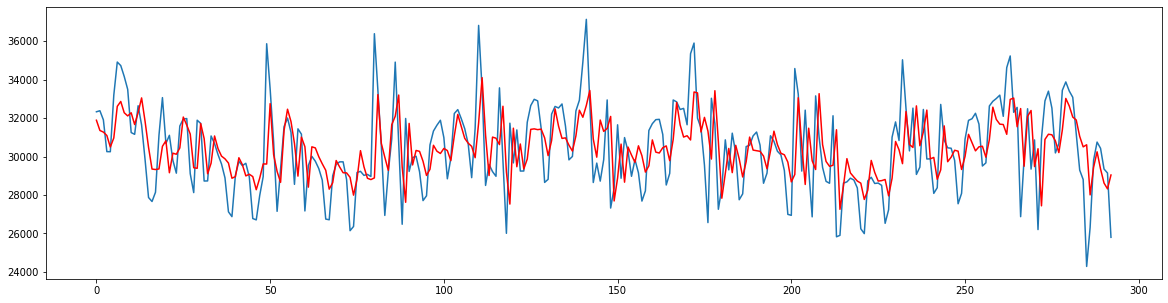

6.898398810028218


In [9]:
merged22 = day_energy.iloc[: , 23]
X = merged22.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

Test MSE: 2390846.244


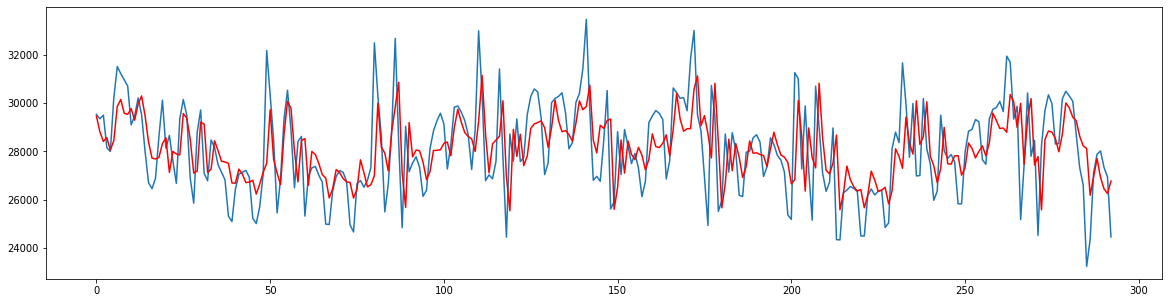

6.388615540380196


In [10]:
merged23 = day_energy.iloc[: , 24]
X = merged23.values
size = int(len(X) * 4/5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(mean_absolute_percentage_error(test, predictions))

The result of each hour is not bad and the average is about 9%. However, the result seems to be better at night times and become worse at day times. The reason could be people using less electricity in the day time, and there are more reason to use electricity so that it is really hard to predict.I